# Development of machine learning models to process Electronic Health Records – Explainable Models

### Imputation Comparison

Lok Hang Toby Lee (2431180L)

In [82]:
import pandas as pd
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sn
from sklearn import metrics


# SET YOUR PATH FOR RESOURCES FILE HERE
resources_path = "C:/Users/USER/OneDrive/GU/Year 4/FYP\MIMIC-III-ML/data/resources"
data_path = "C:/Users/USER/OneDrive/GU/Year 4/FYP/MIMIC-III-ML/data/raw"


In [98]:
data = pd.read_csv(data_path+'/mimic_timeseries_data_not_imputed.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
# Filter out subjects with length of stay < 48 hours for the in-hospital mortality task:
y = pd.read_hdf(data_path+'/vitals_hourly_data_preprocessed.h5', 'Y')['los']
indices_to_remove = []
for i, row in y.iteritems():
    if row < 48:
        indices_to_remove.append(i)
        
data = data.reset_index().set_index('icustay_id').drop(indices_to_remove, axis = 0)
y = y.drop(indices_to_remove, axis = 0)

# Extract only the first 48 hours:
data = data[data['hours_in'] < 48].reset_index().drop('index', axis = 1)


In [109]:
mean_imputed=pd.read_csv(data_path+'/imputed_data/mean_imputed.csv')
joint_imputed=pd.read_csv(data_path+'/imputed_data/joint_imputed.csv')
mice_imputed=pd.read_csv(data_path+'/imputed_data/mice_imputed.csv')
knn_imputed=pd.read_csv(data_path+'/imputed_data/knn_imputed.csv')
midas_imputed=pd.read_csv(data_path+'/imputed_data/midas_imputed.csv')

In [113]:
mean_imputed - data

,icustay_id,subject_id,hadm_id,hours_in,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,0,0,0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN
1,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843307,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN
843308,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
843309,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
843310,0,0,0,0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [124]:
rmse_per_predictor_mean = np.sqrt(np.mean((mean_imputed - data.fillna(0))**2))
rmse_per_predictor_joint = np.sqrt(np.mean((joint_imputed - data.fillna(0))**2))
rmse_per_predictor_knn = np.sqrt(np.mean((knn_imputed - data.fillna(0))**2))
rmse_per_predictor_mice = np.sqrt(np.mean((mice_imputed - data.fillna(0))**2))
rmse_per_predictor_midas = np.sqrt(np.mean((midas_imputed - data.fillna(0))**2))
print('RMSE per predictor:')
print('Mean\tJoint\tknn\tmice\tmidas\tPredictor\n')
for i in range(4,len(rmse_per_predictor_mean)):
    print(str(round(rmse_per_predictor_mean[i], 2)) + '\t' + str(round(rmse_per_predictor_joint[i], 2)) +'\t'  + str(round(rmse_per_predictor_knn[i], 2)) +'\t' + str(round(rmse_per_predictor_mice[i], 2)) +'\t' + str(round(rmse_per_predictor_midas[i], 2)) +'\t' + mean_imputed.columns[i])

RMSE per predictor:
Mean	Joint	knn	mice	midas	Predictor

58.17	58.17	58.17	58.17	58.14	Diastolic blood pressure
0.41	0.41	0.48	0.48	0.47	Fraction inspired oxygen
2.49	2.49	2.76	2.87	3.25	Glascow coma scale eye opening
4.16	4.16	4.41	4.67	4.82	Glascow coma scale motor response
10.82	10.82	11.45	11.25	12.69	Glascow coma scale total
2.49	2.49	2.98	3.08	3.9	Glascow coma scale verbal response
79.03	79.03	79.03	79.03	78.99	Glucose
83.73	83.73	83.73	83.73	83.73	Heart Rate
10.7	10.7	10.7	10.7	10.7	Height
75.27	75.27	75.27	75.27	75.25	Mean blood pressure
90.23	90.23	90.23	90.23	90.6	Oxygen saturation
18.73	18.73	18.73	18.73	18.7	Respiratory rate
115.03	115.03	115.03	115.03	115.03	Systolic blood pressure
20.8	20.8	20.8	20.8	20.93	Temperature
49.36	49.36	49.36	49.36	49.31	Weight
2.5	2.5	2.5	2.5	2.5	pH


In [50]:
mean_imputed

,icustay_id,subject_id,hadm_id,hours_in,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,200003,27513,163557,0,49.000000,0.546215,4.0,6.0,15.0,5.0,110.000000,119.000000,168.889470,58.000000,97.00000,35.000000,91.000000,37.019445,77.500000,7.376545
1,200003,27513,163557,1,52.000000,0.546215,3.0,5.0,12.0,3.0,141.003992,118.000000,168.889470,59.000000,96.00000,32.000000,88.333333,38.999999,77.500000,7.376545
2,200003,27513,163557,2,52.333333,0.546215,3.0,5.0,12.0,3.0,141.003992,116.000000,168.889470,59.666667,95.00000,30.333333,85.333333,38.277790,77.500000,7.376545
3,200003,27513,163557,3,60.500000,0.546215,3.0,5.0,12.0,3.0,141.003992,112.000000,168.889470,65.500000,93.50000,32.500000,86.500000,37.777790,77.500000,7.376545
4,200003,27513,163557,4,61.000000,0.546215,3.0,5.0,12.0,3.0,141.003992,108.000000,168.889470,67.000000,91.50000,37.000000,89.500000,36.833318,77.500000,7.376545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843307,299995,28775,134959,43,82.000000,0.546321,3.0,5.0,12.0,3.0,140.934346,74.000000,168.839091,93.000000,96.89329,19.000000,145.000000,37.019724,80.670815,7.376603
843308,299995,28775,134959,44,60.109355,0.546321,3.0,5.0,12.0,3.0,140.934346,72.000000,168.839091,78.490950,96.89329,20.000000,120.034916,37.019724,80.670815,7.376603
843309,299995,28775,134959,45,60.109355,0.546321,3.0,5.0,12.0,3.0,140.934346,82.000000,168.839091,78.490950,96.89329,20.000000,120.034916,37.019724,80.670815,7.376603
843310,299995,28775,134959,46,65.000000,0.546321,4.0,6.0,15.0,5.0,140.934346,73.000000,168.839091,81.000000,96.89329,20.000000,128.000000,36.555578,80.670815,7.376603


In [48]:
joint_imputed.columns

Index(['icustay_id', 'subject_id', 'hadm_id', 'hours_in',
       'Diastolic blood pressure', 'Fraction inspired oxygen',
       'Glascow coma scale eye opening', 'Glascow coma scale motor response',
       'Glascow coma scale total', 'Glascow coma scale verbal response',
       'Glucose', 'Heart Rate', 'Height', 'Mean blood pressure',
       'Oxygen saturation', 'Respiratory rate', 'Systolic blood pressure',
       'Temperature', 'Weight', 'pH'],
      dtype='object')

In [35]:
mice_imputed

,icustay_id,subject_id,hadm_id,hours_in,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,200003,27513,163557,0,49.000000,1.00,4.0,6.0,15.0,5.0,110.0,119.0,165.05,58.000000,97.0,35.000000,91.000000,37.500000,77.500000,7.4100
1,200003,27513,163557,1,52.000000,0.40,1.0,4.0,6.0,1.0,206.5,118.0,175.13,59.000000,96.0,32.000000,88.333333,38.999999,77.500000,7.4500
2,200003,27513,163557,2,52.333333,0.40,4.0,6.0,15.0,5.0,128.0,116.0,185.21,59.666667,95.0,30.333333,85.333333,38.277790,77.500000,7.3900
3,200003,27513,163557,3,60.500000,0.50,4.0,6.0,15.0,5.0,109.0,112.0,162.78,65.500000,93.5,32.500000,86.500000,37.777790,77.500000,7.3450
4,200003,27513,163557,4,61.000000,0.50,2.0,5.0,8.0,1.0,221.0,108.0,154.97,67.000000,91.5,37.000000,89.500000,36.833318,77.500000,7.3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843307,299995,28775,134959,43,82.000000,0.70,4.0,6.0,15.0,5.0,87.0,74.0,187.98,93.000000,96.0,19.000000,145.000000,36.555578,91.000000,7.4425
843308,299995,28775,134959,44,53.000000,0.30,3.0,6.0,14.0,5.0,161.0,72.0,175.13,68.000000,100.0,20.000000,99.000000,37.299999,73.000000,7.3600
843309,299995,28775,134959,45,96.000000,0.50,2.0,4.0,7.0,1.0,122.0,82.0,182.94,129.000000,100.0,20.000000,171.000000,38.999999,77.099998,7.4400
843310,299995,28775,134959,46,65.000000,0.28,4.0,6.0,15.0,5.0,122.0,73.0,165.05,81.000000,96.0,20.000000,128.000000,36.555578,70.760410,7.3200


In [33]:
knn_imputed

,icustay_id,subject_id,hadm_id,hours_in,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,200003,27513,163557,0,49.000000,0.660000,4.000000,6.000000,15.000000,5.00000,110.000000,119.000000,174.776000,58.000000,97.000000,35.000000,91.000000,36.322222,77.500000,7.394000
1,200003,27513,163557,1,52.000000,0.570000,3.400000,5.000000,12.600000,4.20000,178.100000,118.000000,177.800000,59.000000,96.000000,32.000000,88.333333,38.999999,77.500000,7.309000
2,200003,27513,163557,2,52.333333,0.530000,3.400000,5.400000,13.200000,2.20000,153.900000,116.000000,177.800000,59.666667,95.000000,30.333333,85.333333,38.277790,77.500000,7.246000
3,200003,27513,163557,3,60.500000,0.630000,4.000000,6.000000,12.000000,5.00000,183.950000,112.000000,177.800000,65.500000,93.500000,32.500000,86.500000,37.777790,77.500000,7.413167
4,200003,27513,163557,4,61.000000,0.730000,4.000000,5.800000,14.600000,4.20000,146.516667,108.000000,177.800000,67.000000,91.500000,37.000000,89.500000,36.833318,77.500000,7.351167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843307,299995,28775,134959,43,82.000000,0.500000,3.800000,6.000000,15.000000,5.00000,199.000000,74.000000,173.768000,93.000000,97.800000,19.000000,145.000000,36.955559,77.760000,7.293000
843308,299995,28775,134959,44,50.200000,0.640000,4.000000,4.600000,12.600000,3.20000,131.400000,72.000000,167.166000,71.599993,96.000000,20.000000,119.800000,36.766667,69.980000,7.403000
843309,299995,28775,134959,45,80.200000,0.500000,3.000000,4.600000,11.200000,2.60000,105.200000,82.000000,165.604000,74.333340,96.000000,20.000000,153.000000,37.760000,87.720000,7.394000
843310,299995,28775,134959,46,65.000000,0.560000,4.000000,6.000000,15.000000,5.00000,138.400000,73.000000,169.636000,81.000000,95.200000,20.000000,128.000000,36.555578,96.503467,7.372500


In [51]:
midas_imputed

,icustay_id,subject_id,hadm_id,hours_in,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,200003,27513,163557,0,49.000000,0.224049,4.0,6.0,15.0,5.0,110.000000,119.000000,-77.489685,58.000000,97.000000,35.000000,91.000000,29.325306,77.500000,63.951263
1,200003,27513,163557,1,52.000000,-18.057629,4.0,6.0,8.0,1.0,108.969673,118.000000,413.027924,59.000000,96.000000,32.000000,88.333333,38.999999,77.500000,2.050104
2,200003,27513,163557,2,52.333333,41.439396,4.0,6.0,15.0,5.0,97.362106,116.000000,-25.160233,59.666667,95.000000,30.333333,85.333333,38.277790,77.500000,70.104431
3,200003,27513,163557,3,60.500000,0.343225,4.0,6.0,15.0,5.0,62.831455,112.000000,302.443146,65.500000,93.500000,32.500000,86.500000,37.777790,77.500000,12.201170
4,200003,27513,163557,4,61.000000,-3.808213,2.0,6.0,15.0,5.0,92.346115,108.000000,152.588409,67.000000,91.500000,37.000000,89.500000,36.833318,77.500000,-21.402271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843307,299995,28775,134959,43,82.000000,87.458191,4.0,6.0,15.0,4.0,114.544571,74.000000,123.682121,93.000000,129.598572,19.000000,145.000000,35.929016,101.260437,29.493967
843308,299995,28775,134959,44,55.540924,142.377274,4.0,6.0,15.0,5.0,106.454140,72.000000,-198.215912,74.648705,105.256340,20.000000,113.687149,51.245281,152.172668,14.821047
843309,299995,28775,134959,45,32.176212,108.078362,4.0,6.0,15.0,5.0,99.168007,82.000000,374.339417,62.245487,83.808243,20.000000,88.870239,20.646347,94.686455,33.007862
843310,299995,28775,134959,46,65.000000,180.791214,4.0,6.0,15.0,5.0,143.278320,73.000000,173.573303,81.000000,103.016121,20.000000,128.000000,36.555578,114.580833,66.248062


In [32]:
data

,index,subject_id,hadm_id,hours_in,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
icustay_id,,,,,,,,,,,,,,,,,,,,
200003,0,27513,163557,0,49.000000,NaN,4.0,6.0,15.0,5.0,110.0,119.0,NaN,58.000000,97.0,35.000000,91.000000,NaN,77.5,NaN
200003,1,27513,163557,1,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,118.0,NaN,59.000000,96.0,32.000000,88.333333,38.999999,77.5,NaN
200003,2,27513,163557,2,52.333333,NaN,NaN,NaN,NaN,NaN,NaN,116.0,NaN,59.666667,95.0,30.333333,85.333333,38.277790,77.5,NaN
200003,3,27513,163557,3,60.500000,NaN,NaN,NaN,NaN,NaN,NaN,112.0,NaN,65.500000,93.5,32.500000,86.500000,37.777790,77.5,NaN
200003,4,27513,163557,4,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,67.000000,91.5,37.000000,89.500000,36.833318,77.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2162994,28775,134959,43,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,93.000000,NaN,19.000000,145.000000,NaN,NaN,NaN
299995,2162995,28775,134959,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN
299995,2162996,28775,134959,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN


# Machine Learning comparison (Logistic regression Baseline)

In [115]:
# Extract the in-hospital mortality data:
Y = pd.read_hdf(data_path + '/vitals_hourly_data_preprocessed.h5', 'Y')[['in_hospital_mortality', 'los']]
Y = Y.sort_index(axis = 0, level = 'icustay_id')
config = json.load(open(resources_path+'/discretizer_config.json', 'r'))
categorical_var = [key for key, value in  config['is_categorical_channel'].items() if value][1:]

# Remove the icustays that were less than 48 hours:
indices_to_remove = []
for i, row in Y.iterrows():
    if row['los'] < 48:
        indices_to_remove.append(i)
        
Y = Y.drop(indices_to_remove, axis = 0)

data['in_hospital_mortality']=Y['in_hospital_mortality']
y= data.pop('in_hospital_mortality')


In [116]:
# Minmax standardization of the continuous variables:
def minmax(x):
    mins = x.min()
    maxes = x.max()
    x_std = (x - mins) / (maxes - mins)
    return x_std

imputed_data=[mean_imputed,joint_imputed,mice_imputed,knn_imputed,midas_imputed]
imputed_labels=['Mean-imputed','joint-imputed','mice_imputed','knn_imputed','midas_imputed']

for i in imputed_data:
    for column in i.columns:
        if column not in categorical_var:
            i.loc[:, column] = minmax(i.loc[:, column].values)

In [117]:
from sklearn.model_selection import KFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns

"""
Code taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
"""

# Function that plots roc
def plot_roc(classifier,model,X,y,n_splits,):
    cv = KFold(n_splits)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic (ROC): "+model,
    )
    ax.legend(loc="lower right")
    plt.show()

### Function for plotting confusion matrix

In [15]:
from sklearn.metrics import *

# function that plots the confusion matrix
def plot_confusion(y,y_pred,name):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix (' + name + ')')

In [16]:
def undersample_majority(x_train, y_train):
    
    # Separate the positive and negative x/y data:
    pos_features = x_train[y_train == 1]
    neg_features = x_train[y_train == 0]
    pos_labels = y_train[y_train == 1]
    neg_labels = y_train[y_train == 0]
    
    # Count the number of negative data points, and select that many from the positive data points. This means that 
    # positive samples will be 'copied' or repeated and hence occur multiple times in the training data:
    ids = np.arange(len(neg_features))
    choices = np.random.choice(ids, len(pos_features))
    res_neg_features = neg_features[choices]
    res_neg_labels = neg_labels[choices]
    
    # Combine the resamples and negative data points, and shuffle:
    resampled_features = np.concatenate([res_neg_features, pos_features], axis=0)
    resampled_labels = np.concatenate([res_neg_labels, pos_labels], axis=0)
    order = np.arange(len(resampled_labels))
    np.random.shuffle(order)
    resampled_features = resampled_features[order]
    resampled_labels = resampled_labels[order]
    return resampled_features, resampled_labels

### Logistic regression (Train test split)

[Mean-imputed]
f1_macro: 0.723 (+/- 0.007)
Accuracy: 0.724 (+/- 0.007)
Precision: 0.745 (+/- 0.005)
Recall: 0.681 (+/- 0.015)



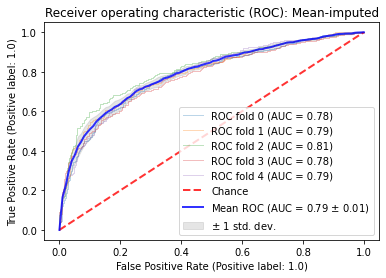

[joint-imputed]
f1_macro: 0.717 (+/- 0.012)
Accuracy: 0.717 (+/- 0.013)
Precision: 0.736 (+/- 0.020)
Recall: 0.677 (+/- 0.017)



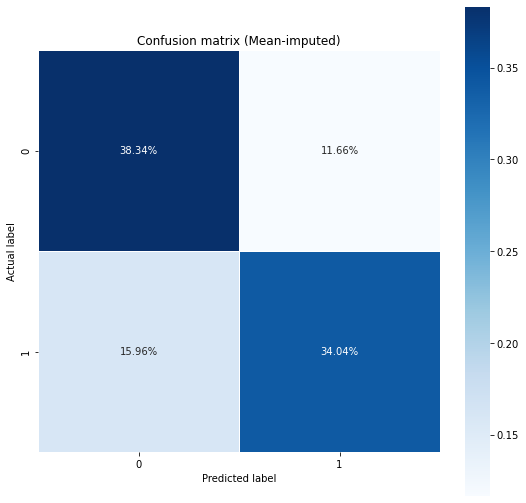

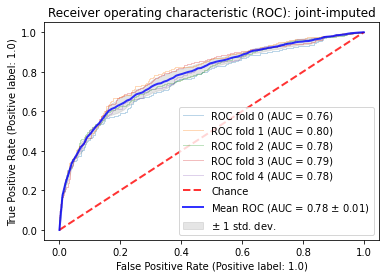

[mice_imputed]
f1_macro: 0.711 (+/- 0.003)
Accuracy: 0.712 (+/- 0.003)
Precision: 0.732 (+/- 0.013)
Recall: 0.670 (+/- 0.017)



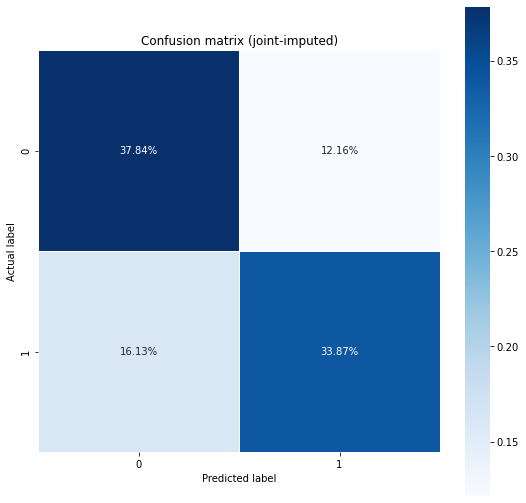

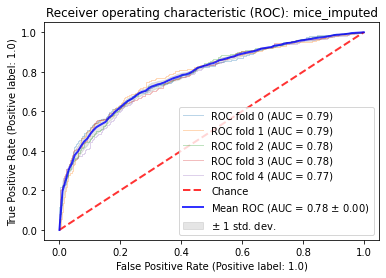

[knn_imputed]
f1_macro: 0.695 (+/- 0.017)
Accuracy: 0.696 (+/- 0.017)
Precision: 0.712 (+/- 0.017)
Recall: 0.658 (+/- 0.021)



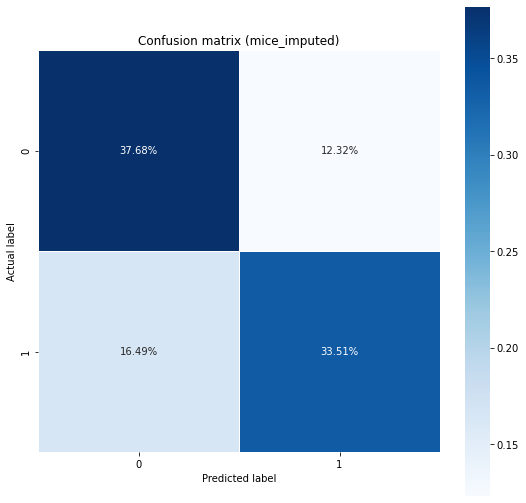

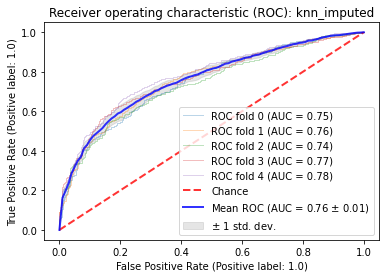

[midas_imputed]
f1_macro: 0.697 (+/- 0.023)
Accuracy: 0.697 (+/- 0.022)
Precision: 0.713 (+/- 0.019)
Recall: 0.659 (+/- 0.036)



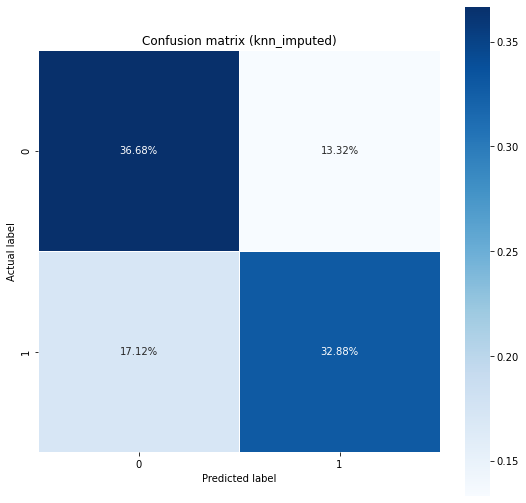

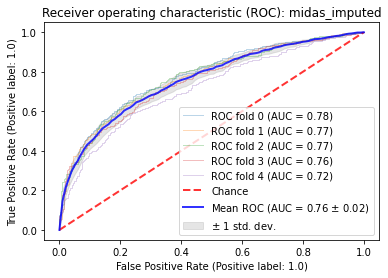

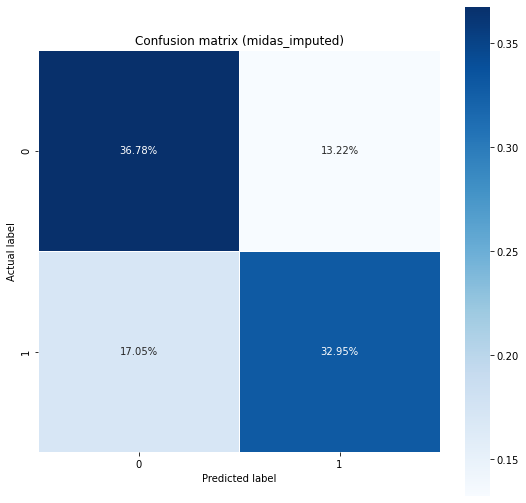

In [119]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict

for i in range(len(imputed_data)):

    x = np.array(list(imputed_data[i].reset_index().groupby('icustay_id').apply(lambda x: x.values[:, 4:])))
    x = np.reshape(x, (x.shape[0], -1)).astype('float32')
    y = np.array(list(Y.groupby('icustay_id').apply(lambda i: i['in_hospital_mortality'].to_numpy())))[:, 0].astype('float32')

    clf_rf = LogisticRegression()

    u_x,u_y = undersample_majority(x,y)

    for clf, label in zip([clf_rf], [imputed_labels[i]]):

        # cross_val_score returns the cross validation score given X,y data, the scoring method and the number of folds
        f1_macro = cross_val_score(clf, u_x, u_y, scoring='f1_macro', cv=5)
        accuracy = cross_val_score(clf, u_x, u_y, scoring='accuracy', cv=5)
        precision = cross_val_score(clf, u_x, u_y, scoring='precision', cv=5)
        recall = cross_val_score(clf, u_x, u_y, scoring='recall', cv=5)
        
        # cross_val_predict returns the prediction, which is used to create useful plots for comparing performance
        y_pred= cross_val_predict(clf, u_x, u_y, cv=5)
        
        
        print("[%s]"%(label))
        print("f1_macro: %0.3f (+/- %0.3f)" % (f1_macro.mean(),f1_macro.std()))
        print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), accuracy.std()))
        print("Precision: %0.3f (+/- %0.3f)" % (precision.mean(),precision.std()))
        print("Recall: %0.3f (+/- %0.3f)" % (recall.mean(), recall.std() ))
        print()
        
        # Plots the ROC and confusion matrix, this is commented for readibility of code.
        plot_roc(clf,label,u_x,u_y,n_splits=5)
        plot_confusion(u_y,y_pred,label)

# Root mean scared error comparison

In [68]:
data 

,index,subject_id,hadm_id,hours_in,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
icustay_id,,,,,,,,,,,,,,,,,,,,
200003,0,27513,163557,0,49.000000,NaN,4.0,6.0,15.0,5.0,110.0,119.0,NaN,58.000000,97.0,35.000000,91.000000,NaN,77.5,NaN
200003,1,27513,163557,1,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,118.0,NaN,59.000000,96.0,32.000000,88.333333,38.999999,77.5,NaN
200003,2,27513,163557,2,52.333333,NaN,NaN,NaN,NaN,NaN,NaN,116.0,NaN,59.666667,95.0,30.333333,85.333333,38.277790,77.5,NaN
200003,3,27513,163557,3,60.500000,NaN,NaN,NaN,NaN,NaN,NaN,112.0,NaN,65.500000,93.5,32.500000,86.500000,37.777790,77.5,NaN
200003,4,27513,163557,4,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,67.000000,91.5,37.000000,89.500000,36.833318,77.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2162994,28775,134959,43,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,93.000000,NaN,19.000000,145.000000,NaN,NaN,NaN
299995,2162995,28775,134959,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN
299995,2162996,28775,134959,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN


In [ ]:
scaler=MinMaxScaler()

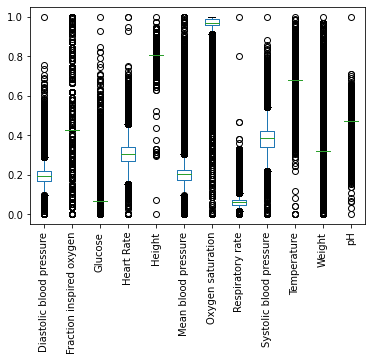

In [18]:
mean_boxplot = mean_imputed.boxplot(column=['Diastolic blood pressure','Fraction inspired oxygen', 'Glucose', 'Heart Rate', 'Height','Mean blood pressure', 'Oxygen saturation', 'Respiratory rate','Systolic blood pressure', 'Temperature', 'Weight', 'pH'], grid=False, rot=90)   

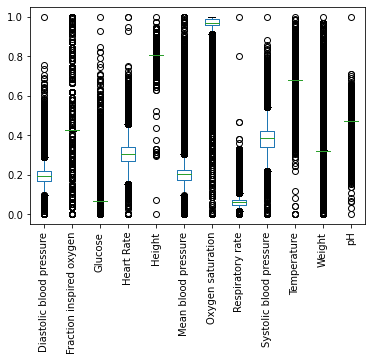

In [19]:
joint_boxplot = joint_imputed.boxplot(column=['Diastolic blood pressure','Fraction inspired oxygen', 'Glucose', 'Heart Rate', 'Height','Mean blood pressure', 'Oxygen saturation', 'Respiratory rate','Systolic blood pressure', 'Temperature', 'Weight', 'pH'], grid=False, rot=90)  

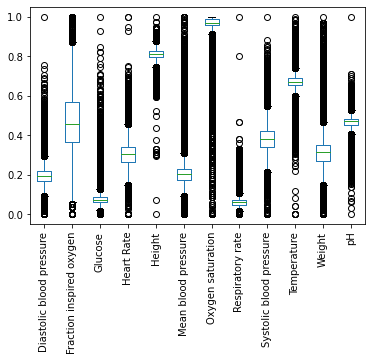

In [20]:
knn_boxplot = knn_imputed.boxplot(column=['Diastolic blood pressure','Fraction inspired oxygen', 'Glucose', 'Heart Rate', 'Height','Mean blood pressure', 'Oxygen saturation', 'Respiratory rate','Systolic blood pressure', 'Temperature', 'Weight', 'pH'], grid=False, rot=90)  

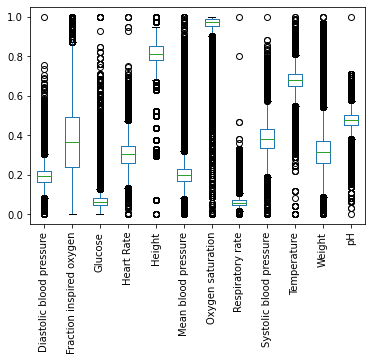

In [21]:
mice_boxplot = mice_imputed.boxplot(column=['Diastolic blood pressure','Fraction inspired oxygen', 'Glucose', 'Heart Rate', 'Height','Mean blood pressure', 'Oxygen saturation', 'Respiratory rate','Systolic blood pressure', 'Temperature', 'Weight', 'pH'], grid=False, rot=90) 

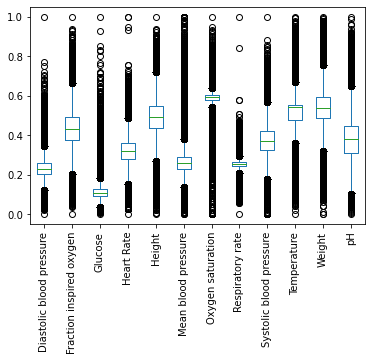

In [46]:
midas_boxplot = midas_imputed.boxplot(column=['Diastolic blood pressure','Fraction inspired oxygen', 'Glucose', 'Heart Rate', 'Height','Mean blood pressure', 'Oxygen saturation', 'Respiratory rate','Systolic blood pressure', 'Temperature', 'Weight', 'pH'], grid=False, rot=90) 